## NBA Birthplace Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina'

In [2]:
pwd

'/users/atoliver/ds_1300_notebooks/work/project'

In [3]:
#imports dataset with all the birthplaces
place= pd.read_csv('/users/atoliver/ds_1300_notebooks/work/project/NBA_Demographics.csv')
birthplace=place[['Player', 'City', 'Region']]
birthplace.head()

,Player,City,Region
0,Michael Ansley,Birmingham,Alabama
1,Keith Askins,Athens,Alabama
2,Carl Bailey,Birmingham,Alabama
3,Charles Barkley*,Leeds,Alabama
4,Eric Bledsoe,Birmingham,Alabama


In [4]:
birthplace['Player'] = birthplace['Player'].str.replace('[^\w\s]','')

/tmp/ipykernel_11045/877996602.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  birthplace['Player'] = birthplace['Player'].str.replace('[^\w\s]','')
/tmp/ipykernel_11045/877996602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birthplace['Player'] = birthplace['Player'].str.replace('[^\w\s]','')


In [6]:
#imports rank dataset
rank= pd.read_csv('/users/atoliver/ds_1300_notebooks/work/project/PER_Ranking.csv')
ranks=rank[['Rk','Player']]
ranks.head()

,Rk,Player
0,196,NaN
1,1,James Harden\hardeja01
2,2,Anthony Davis\davisan02
3,3,LeBron James\jamesle01
4,4,Stephen Curry\curryst01


In [7]:
Names=ranks['Player'].str.split(pat = '\\', expand = True) #splits the ID number to dif column
Names['Rk']=ranks['Rk']
Names.columns=['Player_','ID','Rk']
Names=Names.reindex(columns=['Rk','Player_','ID'])
Names.drop('ID', axis = 1, inplace = True) #drops the ID number bc not necessary

In [8]:
#merges so have rank, player, and birthplace in same dataframe
total=Names.merge(birthplace,left_on='Player_', right_on='Player')
total

,Rk,Player_,Player,City,Region
0,1,James Harden,James Harden,Los Angeles,California
1,2,Anthony Davis,Anthony Davis,Chicago,Illinois
2,3,LeBron James,LeBron James,Akron,Ohio
3,4,Stephen Curry,Stephen Curry,Akron,Ohio
4,5,Giannis Antetokounmpo,Giannis Antetokounmpo,Athens,Greece
...,...,...,...,...,...
171,189,Bryn Forbes,Bryn Forbes,Lansing,Michigan
172,190,Stanley Johnson,Stanley Johnson,Los Angeles,California
173,191,Tony Snell,Tony Snell,Los Angeles,California
174,194,Dragan Bender,Dragan Bender,Capljina,Bosnia and Herzegovina


In [10]:
nba_states = pd.DataFrame(total['Region'].value_counts()) #might need to make another column that counts the rows
NBAstates=nba_states.reset_index()
NBAstates.columns=['State','StateTotal']
NBAstates.head()

,State,StateTotal
0,California,26
1,Texas,11
2,Maryland,8
3,New York,8
4,Indiana,7


In [12]:
#DID NOT END UP USING THIS because was not a very clear way to analyze the data
#getting the average ranking from each us state and display that in bar graph
relevant_NBAstates=NBAstates[NBAstates['StateTotal']>1]
state_ave={}
for State in relevant_NBAstates['State'].tolist():
    ave=total[total['Region'] == State]["Rk"].mean()
    state_ave.update({State:ave})
aves=pd.DataFrame(state_ave, index=[0])
aves_=aves.T
StateAves=aves_.reset_index()
StateAves.columns=['State','AveRank']
StateAves['AveRank'] = StateAves['AveRank'].astype(int)
ranked=StateAves.sort_values(by='AveRank',ascending=False)

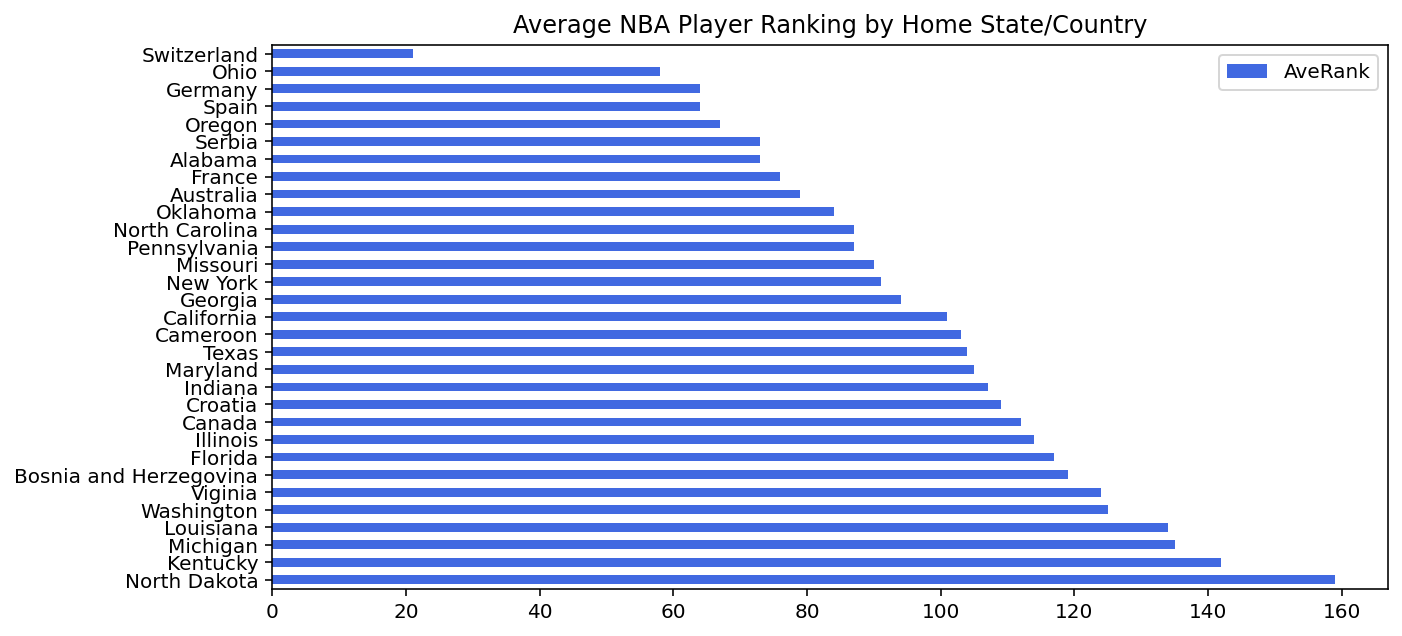

In [13]:
#DID NOT END UP USING THIS because was not a very clear way to analyze the data
plot0 = ranked.plot(
    kind='barh',
    figsize=(10,5), 
    color='royalblue',
    legend=True)
plot0.set_yticklabels(ranked['State']);
plot0.set_title('Average NBA Player Ranking by Home State/Country');

In [11]:
total['City'].value_counts()[:7]

Los Angeles     7
Indianapolis    5
Houston         5
Toronto         4
Brooklyn        3
Chicago         3
Grand Forks     2
Name: City, dtype: int64

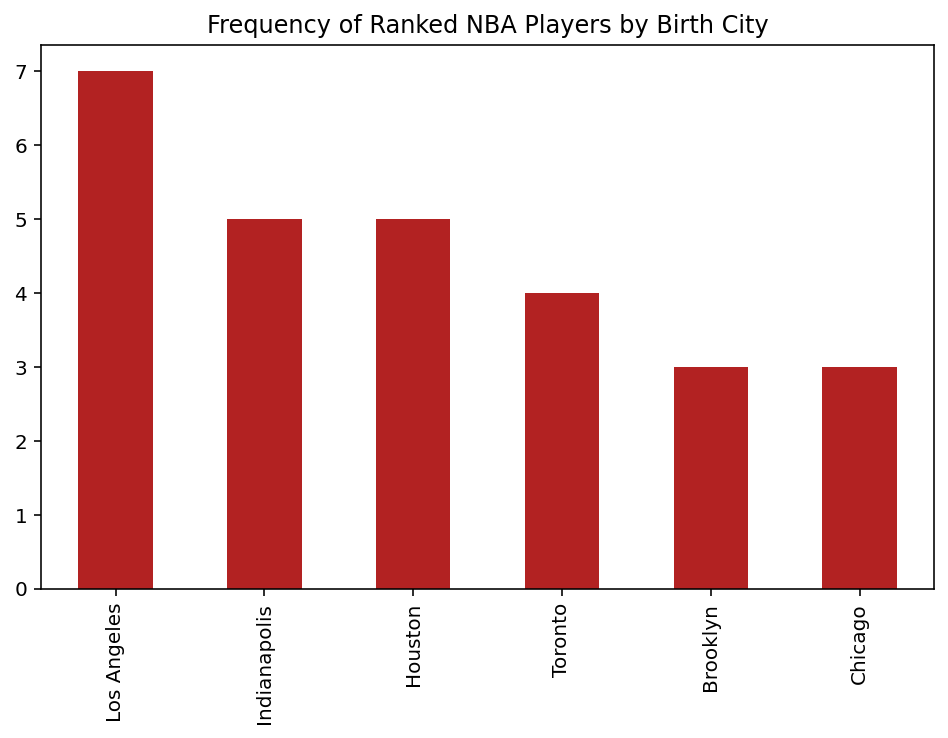

In [12]:
plot1 = total['City'].value_counts()[:6].plot(
    kind='bar', 
    color='firebrick',
    figsize=(8,5))
plot1.set_title('Frequency of Ranked NBA Players by Birth City');
plot1.figure.savefig('NBA_cities.pdf', bbox_inches='tight')

In [13]:
import geopandas

In [14]:
usa = geopandas.read_file('/users/atoliver/ds_1300_notebooks/work/project/cb_2018_us_state_5m.shp')

In [15]:
#removing territories
USA=usa[(usa['NAME']!=('Puerto Rico'))&(usa['NAME']!=('American Samoa'))&(usa['NAME']!=('Guam'))&(usa['NAME']!=('Commonwealth of the Northern Mariana Islands'))&(usa['NAME']!=('United States Virgin Islands'))&(usa['NAME']!=('Alaska'))&(usa['NAME']!=('Hawaii'))]

In [16]:
#combining the US state geometry data and the state total data
merged = pd.merge(NBAstates,USA, left_on='State', right_on='NAME', how='outer')
gdf=geopandas.GeoDataFrame(merged)

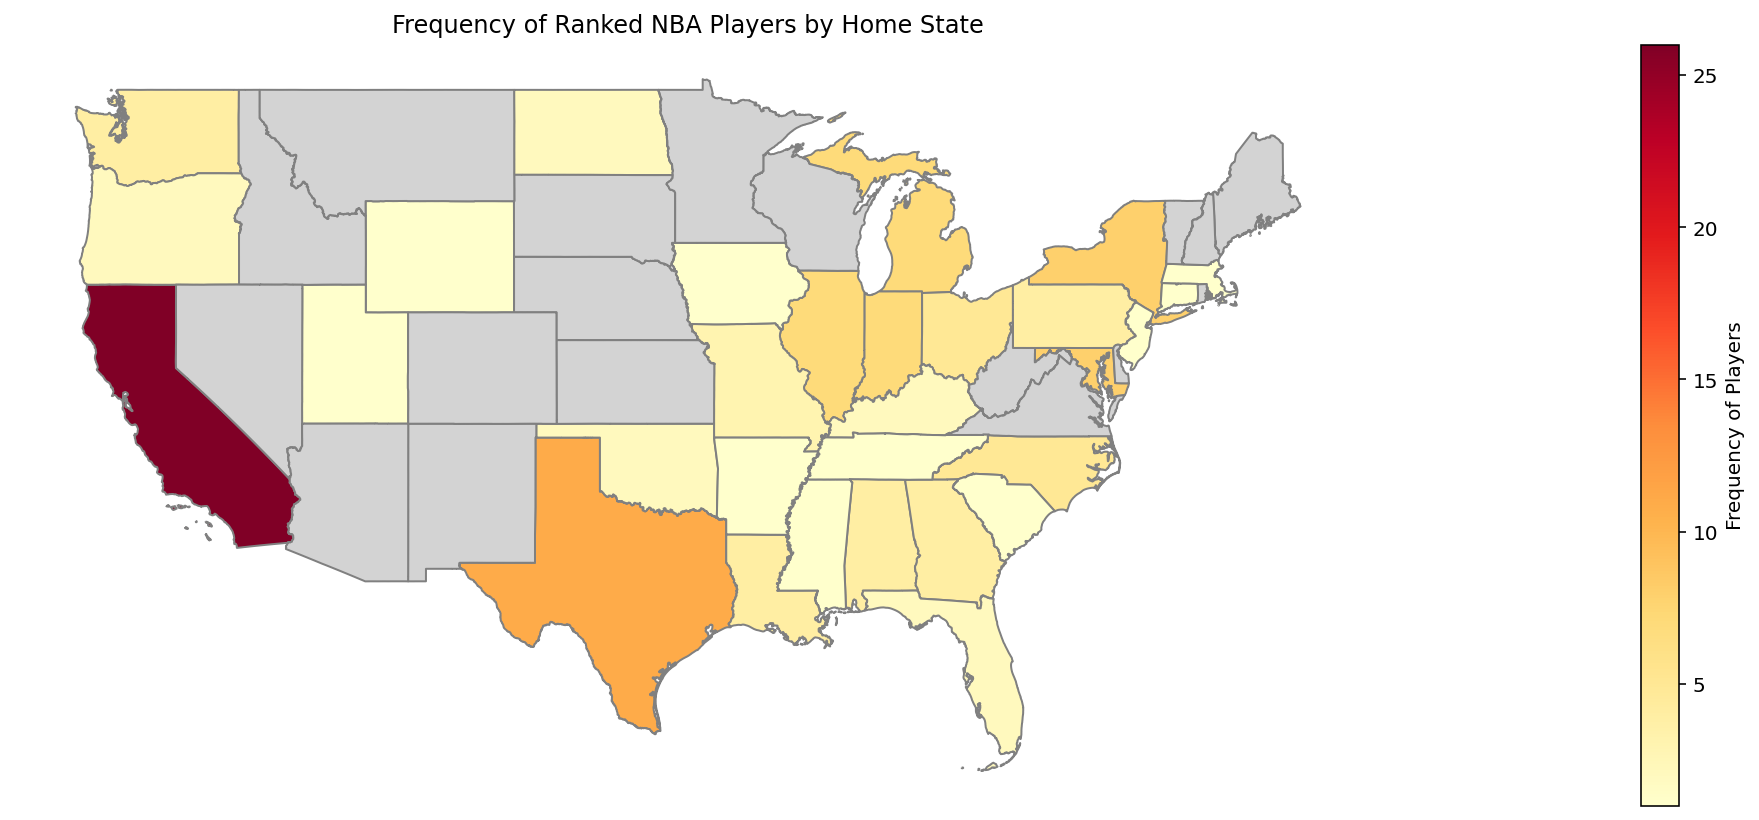

In [17]:
Map=gdf.plot(
     column="StateTotal",
     legend=True,
     figsize=(50, 7),
     cmap='YlOrRd',
     edgecolor='gray',
     legend_kwds={
         'label': "Frequency of Players"},
     missing_kwds={
         "color": "lightgrey",
         "label": "Missing values",
     },
 );
Map.set_title('Frequency of Ranked NBA Players by Home State')
Map.set_axis_off();
Map.figure.savefig('NBA_USplayers.pdf')

In [18]:
#trying to make the world map to reflect the players from outside the US
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [19]:
#comping total one to USA to get just the non US players
nonUSplayers= total[~total['Region'].isin(USA['NAME'])].reset_index(drop=True)
nba_countries = pd.DataFrame(nonUSplayers['Region'].value_counts()) 
NBAcountries=nba_countries.reset_index()
NBAcountries.columns=['Country','CountryTotal']
relNBAcountries=NBAcountries[NBAcountries['CountryTotal']>1]
relNBAcountries

,Country,CountryTotal
0,Canada,6
1,Australia,4
2,Bosnia and Herzegovina,3
3,Switzerland,3
4,Cameroon,3
5,France,3
6,Spain,3
7,Serbia,2
8,Viginia,2
9,Germany,2


In [20]:
merged_world2 = pd.merge(world,relNBAcountries, left_on='name', right_on='Country', how='outer')
gdf3=geopandas.GeoDataFrame(merged_world2)

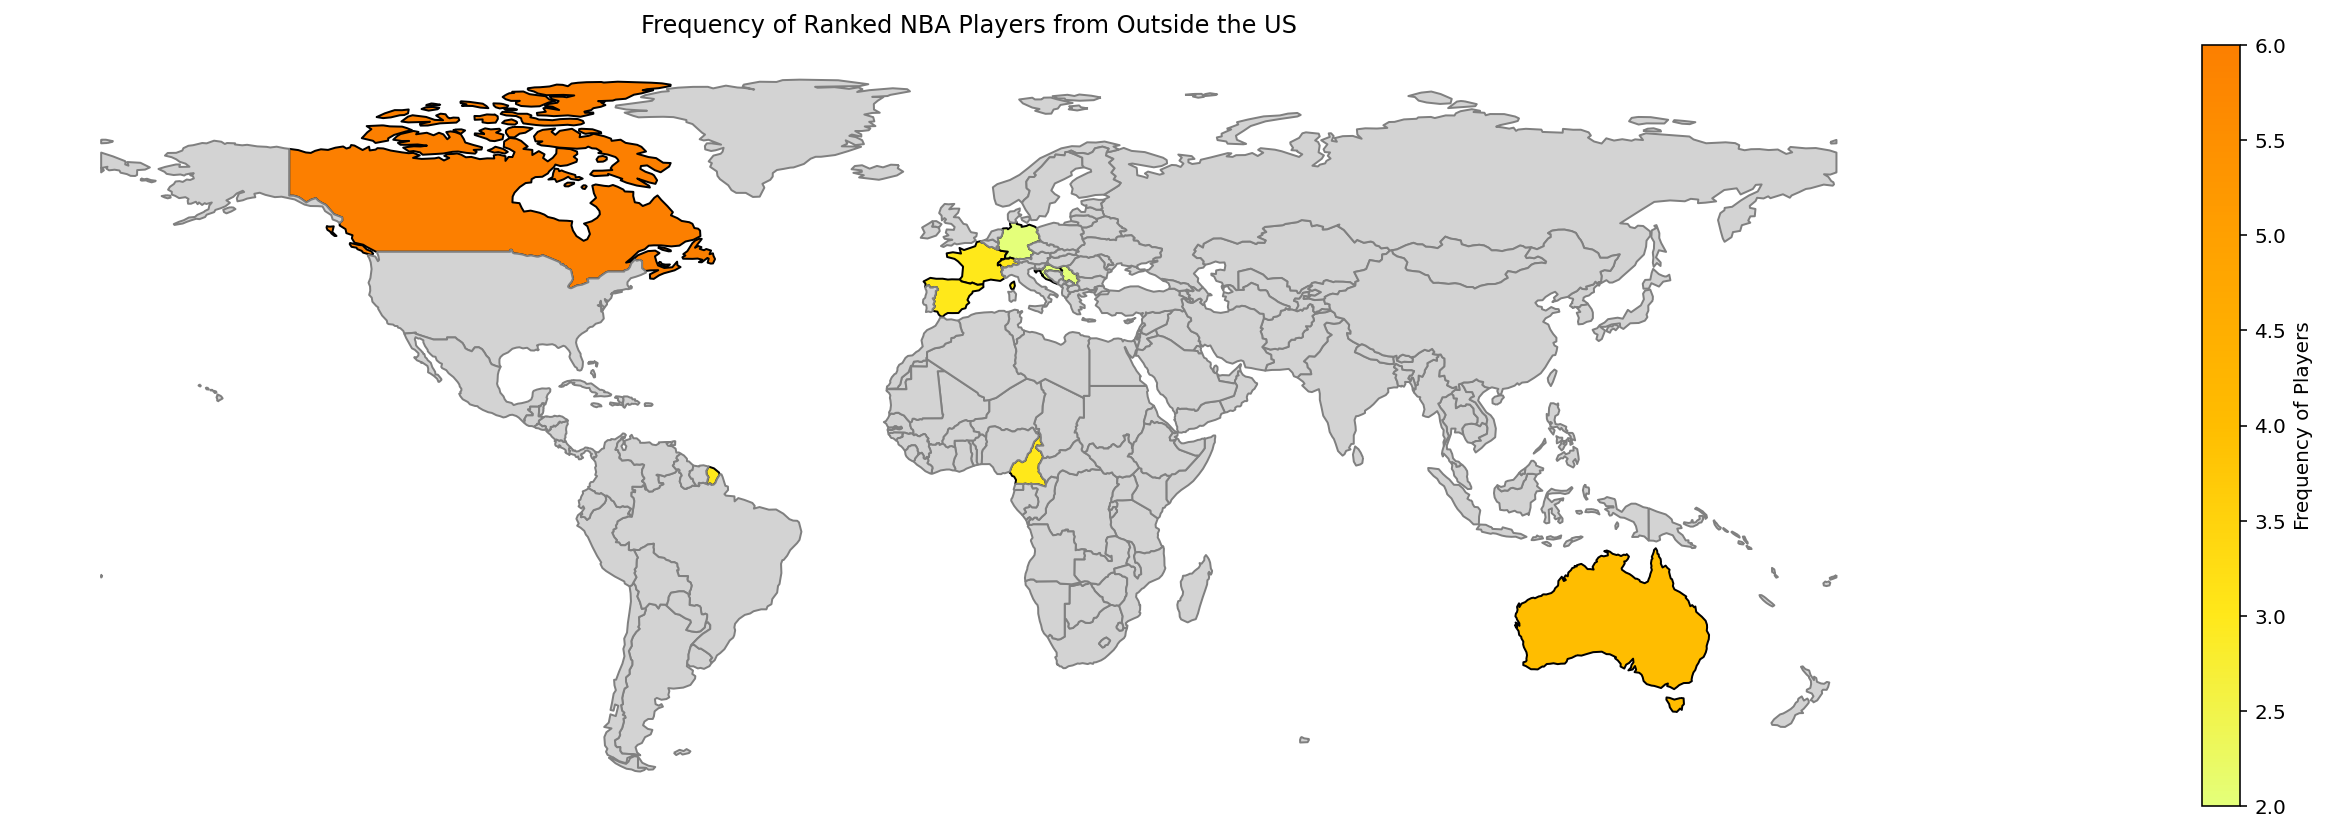

In [21]:
globe2=gdf3.plot(
     column="CountryTotal",
     legend=True,
     figsize=(50, 7),
     cmap='Wistia',
     edgecolor='black',
     legend_kwds={
         'label': "Frequency of Players"},
    missing_kwds={
         "color": "lightgrey",
         "edgecolor":"gray",
         "label": "Missing values",}
);
globe2.set_title('Frequency of Ranked NBA Players from Outside the US');
globe2.set_axis_off();
globe2.figure.savefig('NBA_nonUSplayers.pdf')